# Import Libraries

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Load The Dataset

In [23]:
columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
df = pd.read_csv(r'/content/iris.data', names = columns)

# Understand The Dataset

In [24]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df.shape

(150, 5)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [26]:
df.isnull().sum()

,0
sepal length,0
sepal width,0
petal length,0
petal width,0
class,0


In [27]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Clean data,**
**Balanced classes,**
**No missing values**

# EDA

## Class Distribution

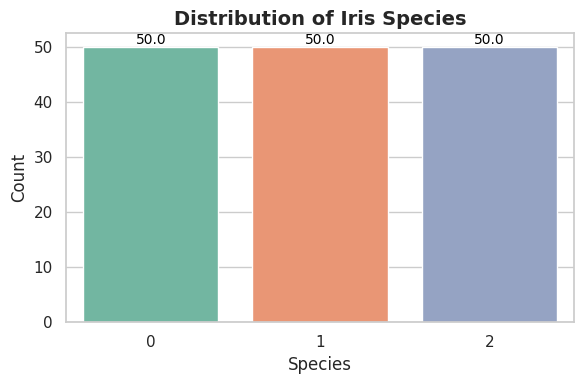

In [64]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class', hue='class', palette='Set2', legend=False)

plt.title("Distribution of Iris Species", fontsize=14, weight='bold')
plt.xlabel("Species", fontsize=12)
plt.ylabel("Count", fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height()}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

## Relationships Between Features


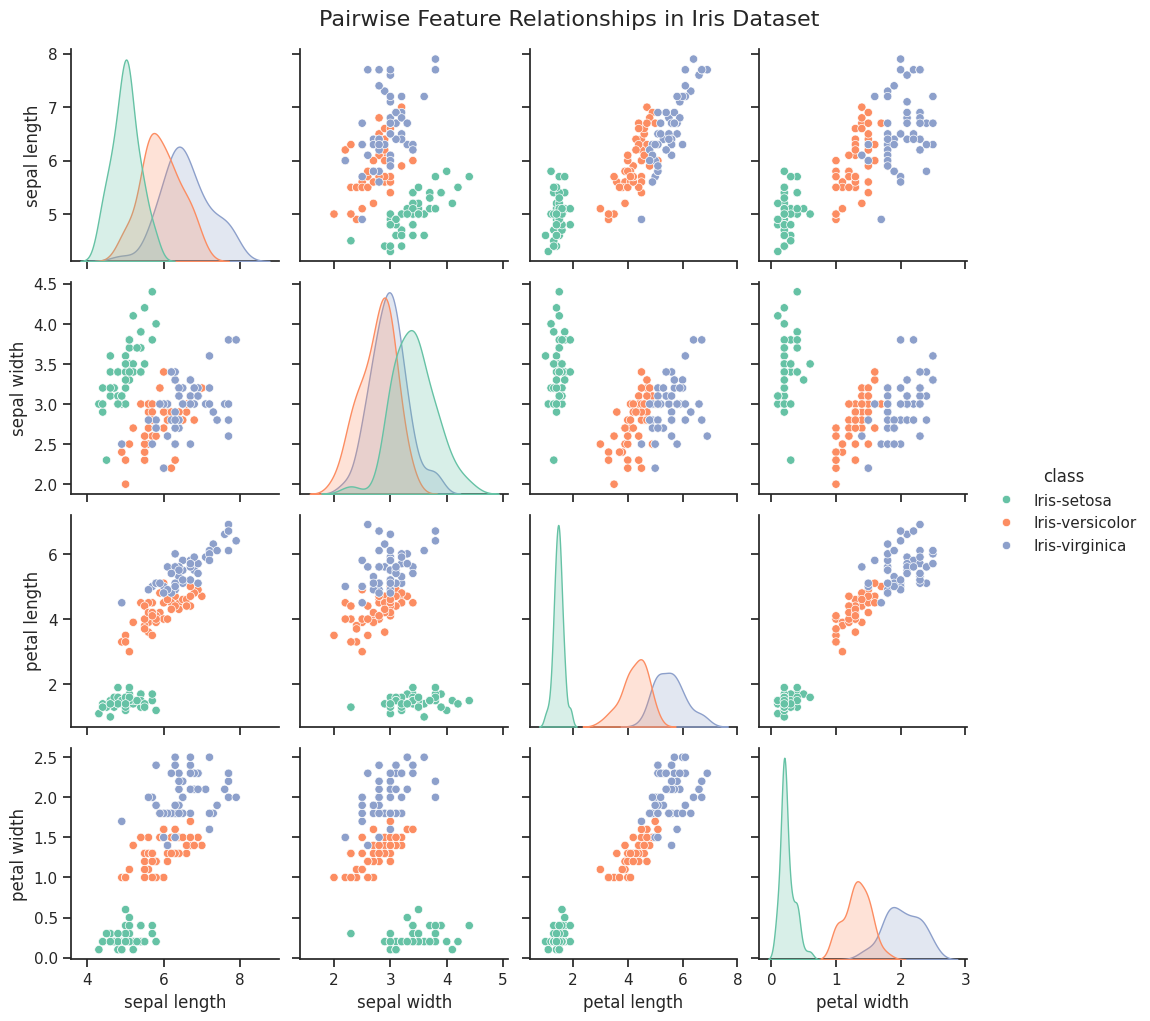

In [29]:
sns.pairplot(df, hue='class', palette='Set2', diag_kind='kde')


plt.suptitle('Pairwise Feature Relationships in Iris Dataset', fontsize=16, y=1.02)
plt.show()

## Feature Distributions by Species

In [30]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

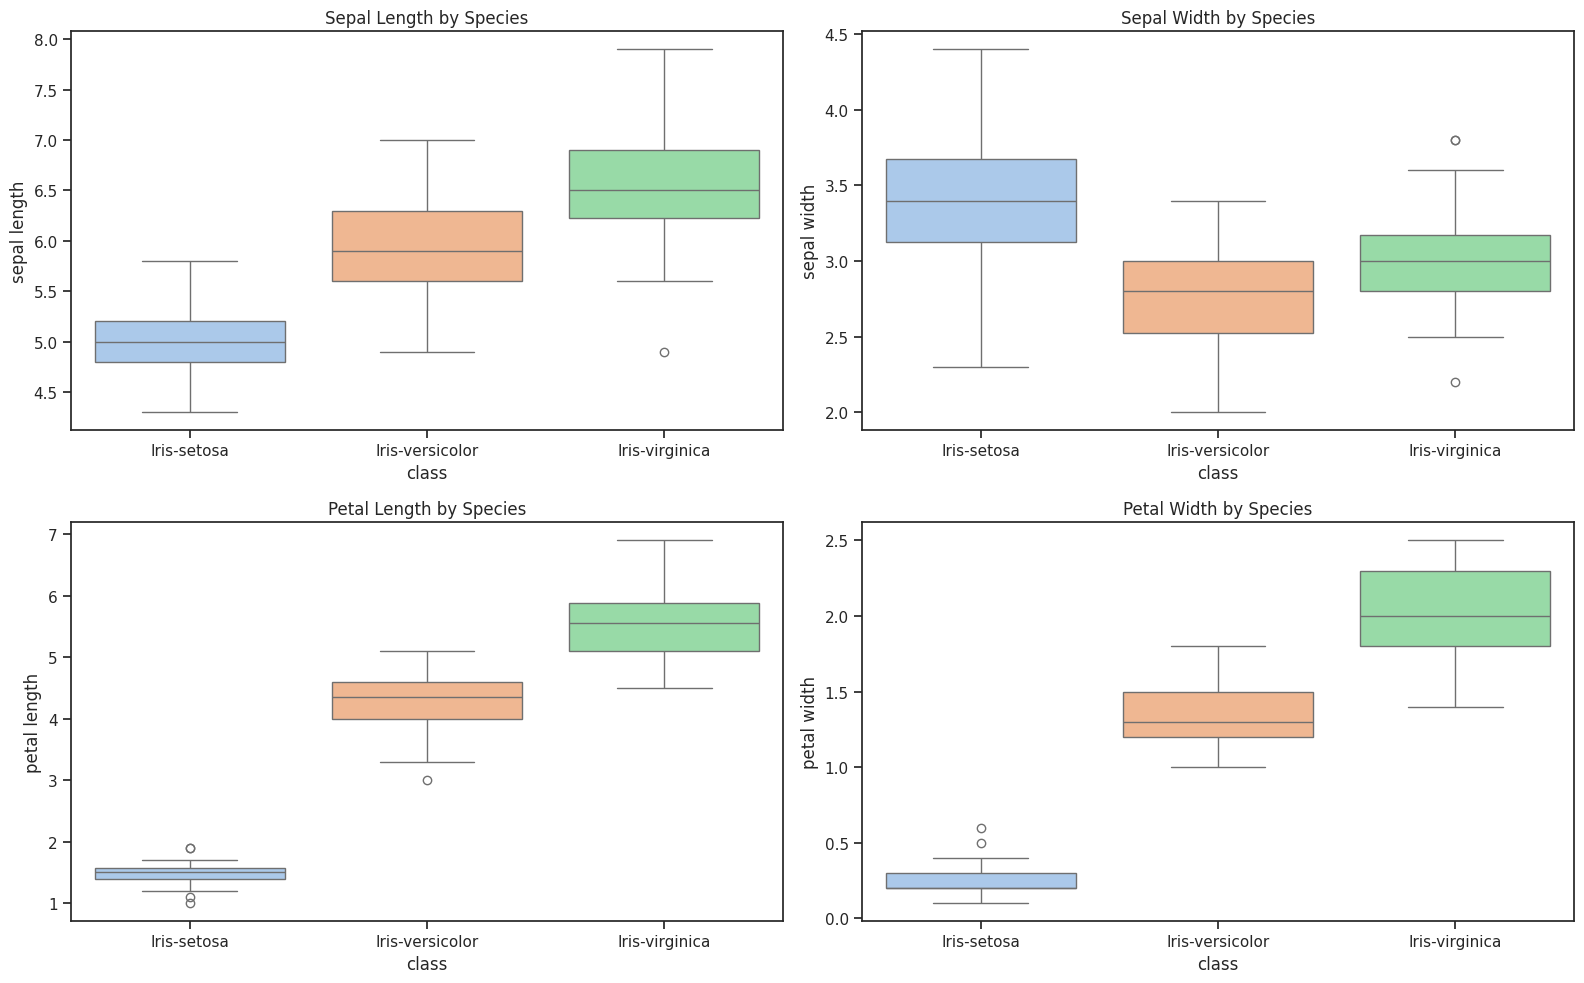

In [31]:
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, x='class', y=feature, hue='class', palette='pastel', legend=False)
    plt.title(f'{feature.replace("_", " ").title()} by Species')

plt.tight_layout()
plt.show()

## Prepare the Data

In [52]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [53]:
X = df.drop('class', axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [54]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Train and evaluate

In [56]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

Logistic Regression: 0.9333
KNN: 0.9778
SVM: 0.9556
Decision Tree: 0.9111
Random Forest: 0.9111
Naive Bayes: 0.9111
Gradient Boosting: 0.9333


/tmp/ipython-input-57-38107622.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.values()), y=list(results.keys()), palette='viridis')


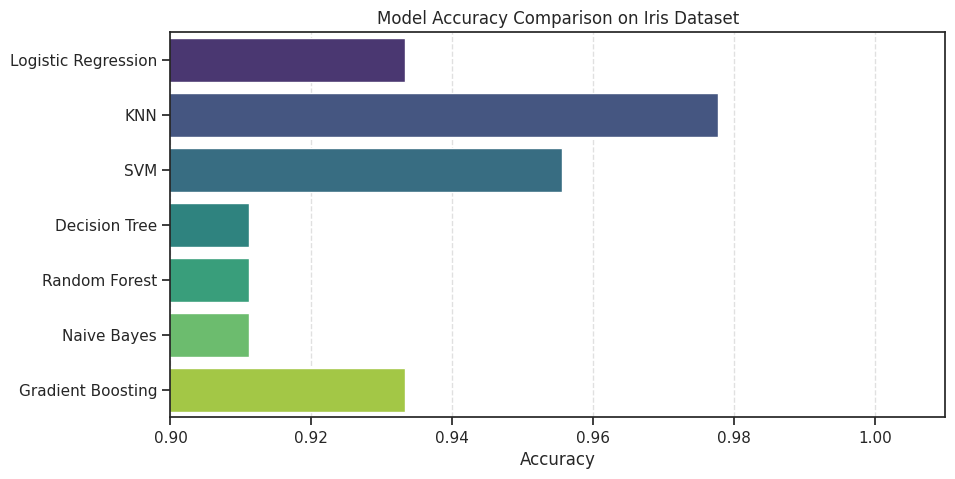

In [57]:
# Plot results
plt.figure(figsize=(10,5))
sns.barplot(x=list(results.values()), y=list(results.keys()), palette='viridis')
plt.xlabel("Accuracy")
plt.title("Model Accuracy Comparison on Iris Dataset")
plt.xlim(0.9, 1.01)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# visualize the confusion matrices

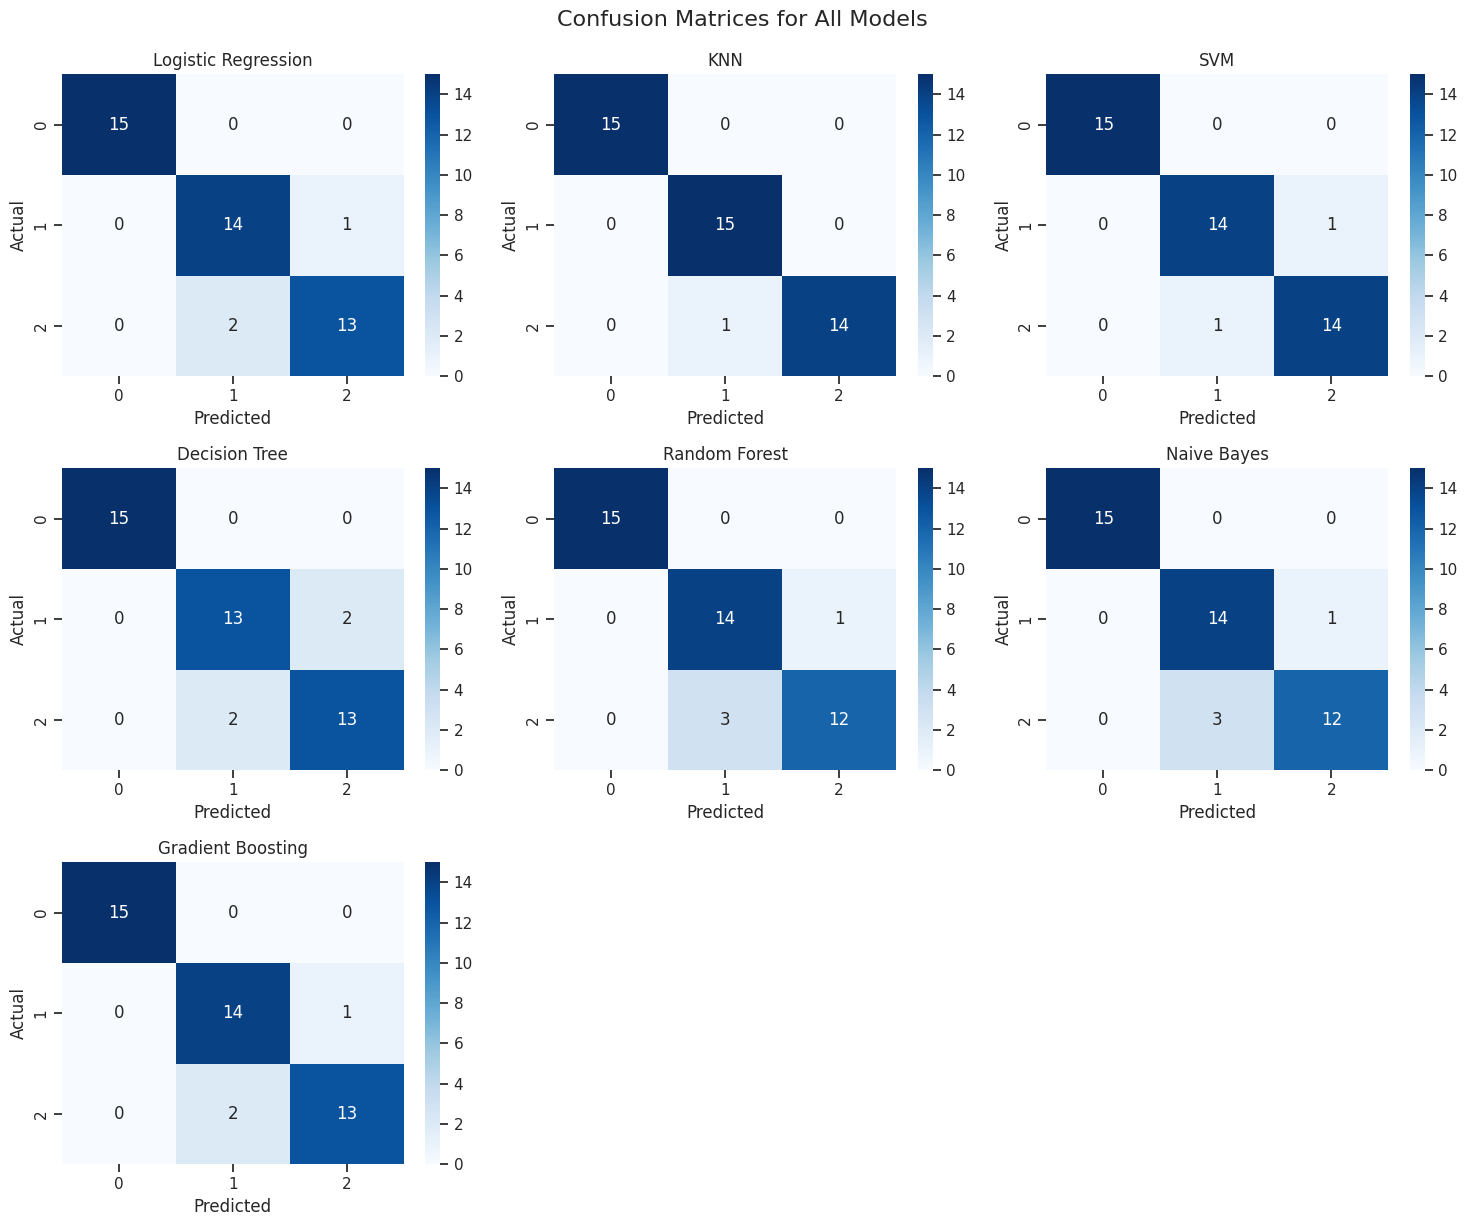

In [60]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx],
                xticklabels=le.classes_, yticklabels=le.classes_)
    axes[idx].set_title(f"{name}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Confusion Matrices for All Models", fontsize=16, y=1.02)
plt.show()
